In [16]:
import pandas as pd 
df = pd.read_csv("results/logs/linear_genetic.csv")
df.head()

,timestamp,model,categories,size,train_accuracy,test_accuracy,epochs,learning_rate,algo
0,2025-07-23T16:26:07.873043,linear,"['Horreur', 'Animation', 'Action']",15x10,0.567296,0.497487,361.972681,0.105471,gradient-descent
1,2025-07-23T16:28:01.008604,linear,"['Horreur', 'Animation', 'Action']",15x10,0.423100,0.438900,839.000000,0.027900,rosenblatt
2,2025-07-23T16:28:39.324585,linear,"['Horreur', 'Animation', 'Action']",15x10,0.590800,0.527600,813.000000,0.101200,gradient-descent
3,2025-07-23T16:29:18.633351,linear,"['Horreur', 'Animation', 'Action']",15x10,0.501000,0.472400,1697.000000,0.031300,rosenblatt
4,2025-07-23T16:29:32.476540,linear,"['Horreur', 'Animation', 'Action']",15x10,0.491000,0.479100,585.000000,0.032700,rosenblatt


In [17]:
df = df.iloc[:150,:]

In [2]:
#df = df[df.categories.str.contains("ction")]
df[df["test_accuracy"]==df.test_accuracy.max()]

,timestamp,model_type,categories,image_size,train_accuracy,test_accuracy,soft_margin
4,2025-07-22T03:24:26.694176,OneVsRest,"['Horreur', 'Animation', 'Action']",15x10,0.5254,0.5477,0.5


In [5]:
import pandas as pd
import plotly.graph_objects as go
# Création du graphique
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['soft_margin'],
    y=df['train_accuracy'],
    mode='lines+markers',
    name='Train Accuracy'
))

fig.add_trace(go.Scatter(
    x=df['soft_margin'],
    y=df['test_accuracy'],
    mode='lines+markers',
    name='Test Accuracy'
))

fig.update_layout(
    title='Accuracy vs Soft Margin',
    xaxis_title='Soft Margin',
    yaxis_title='Accuracy',
    yaxis=dict(range=[0, 1]),
    template='plotly_white'
)

fig.show()

In [15]:
import plotly.graph_objects as go

df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create Plotly figure with scatter + line
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df['timestamp'], y=df['train_accuracy'],
    mode='lines+markers', name='Train Accuracy'
))
fig.add_trace(go.Scatter(
    x=df['timestamp'], y=df['test_accuracy'],
    mode='lines+markers', name='Test Accuracy'
))
fig.update_layout(
    title="Train and Test Accuracy vs Time",
    xaxis_title="Timestamp",
    yaxis_title="Accuracy",
    legend_title="Metric"
)

fig.show()

C:\Users\AIO\AppData\Local\Temp\ipykernel_6096\1813437215.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assure-toi que timestamp est bien converti
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Crée la figure
fig = go.Figure()

# Ajoute les courbes
fig.add_trace(go.Scatter(
    x=df['timestamp'], y=df['train_accuracy'],
    mode='lines+markers', name='Train Accuracy'
))
fig.add_trace(go.Scatter(
    x=df['timestamp'], y=df['test_accuracy'],
    mode='lines+markers', name='Test Accuracy'
))

# Ajouter des lignes verticales tous les 15 points (séparation de générations)
generation_interval = 15
for i in range(generation_interval, len(df), generation_interval):
    ts = df['timestamp'].iloc[i]
    fig.add_shape(
        dict(
            type="line",
            x0=ts, x1=ts,
            y0=0, y1=1,
            xref='x', yref='paper',
            line=dict(color="gray", dash="dash")
        )
    )

# Layout
fig.update_layout(
    title="Train and Test Accuracy vs Time (avec générations)",
    xaxis_title="Timestamp",
    yaxis_title="Accuracy",
    legend_title="Metric",
    template="plotly_white",  # Tu peux changer à "none" si tu veux full custom
    xaxis=dict(
        showgrid=True,
        gridcolor='lightblue',
        gridwidth=1
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightblue',
        gridwidth=1,
        range=[0, 1]  # Pour forcer l'axe Y à [0,1]
    )
)

fig.show()


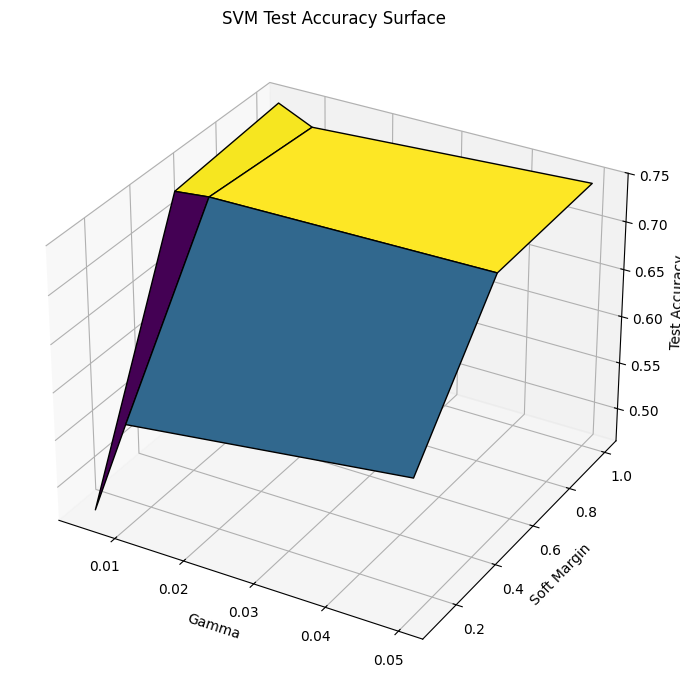

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Pivot the table into a meshgrid-compatible form
pivot = df.pivot_table(index='Soft_Margin', columns='gamma', values='test_accuracy')
X, Y = np.meshgrid(pivot.columns.values, pivot.index.values)
Z = pivot.values

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')

# Labels
ax.set_xlabel('Gamma')
ax.set_ylabel('Soft Margin')
ax.set_zlabel('Test Accuracy')
ax.set_title('SVM Test Accuracy Surface')

plt.tight_layout()
plt.show()


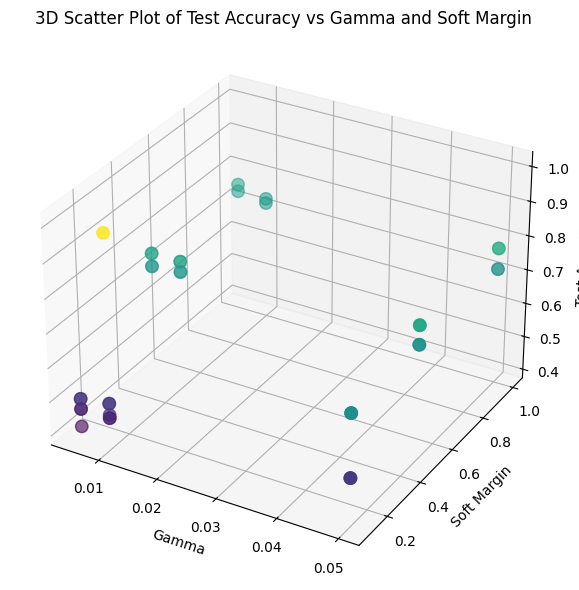

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Create plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df["gamma"], df["Soft_Margin"], df["test_accuracy"], c=df["test_accuracy"], cmap='viridis', s=80)

# Labels
ax.set_xlabel('Gamma')
ax.set_ylabel('Soft Margin')
ax.set_zlabel('Test Accuracy')
ax.set_title('3D Scatter Plot of Test Accuracy vs Gamma and Soft Margin')

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
df = pd.read_csv("results/logs/svm_linear.csv")
df

,timestamp,model_type,categories,image_size,train_accuracy,test_accuracy,soft_margin
0,2025-07-22T03:05:50.906115,OneVsRest,"['Horreur', 'Animation', 'Action']",15x10,0.4553,0.4941,0.10
1,2025-07-22T03:07:22.133542,OneVsOne,"['Horreur', 'Animation', 'Action']",15x10,0.4478,0.4740,0.10
2,2025-07-22T03:20:44.270464,OneVsRest,"['Horreur', 'Animation', 'Action']",15x10,0.5367,0.5343,0.10
3,2025-07-22T03:15:57.019154,OneVsOne,"['Horreur', 'Animation', 'Action']",15x10,0.4692,0.4791,0.10
4,2025-07-22T03:24:26.694176,OneVsRest,"['Horreur', 'Animation', 'Action']",15x10,0.5254,0.5477,0.50
5,2025-07-22T03:17:27.676311,OneVsOne,"['Horreur', 'Animation', 'Action']",15x10,0.4465,0.4271,0.50
6,2025-07-22T03:24:01.366466,OneVsRest,"['Horreur', 'Animation', 'Action']",15x10,0.5245,0.5092,1.00
7,2025-07-22T03:17:40.807476,OneVsOne,"['Horreur', 'Animation', 'Action']",15x10,0.5174,0.5042,1.00
8,2025-07-22T03:53:14.123847,OneVsRest,"['Horreur', 'Animation', 'Action']",15x10,0.4407,0.4456,0.01
9,2025-07-22T03:58:55.299073,OneVsRest,"['Horreur', 'Animation', 'Action']",15x10,0.4423,0.4439,0.05


In [11]:
df.sort_values(by=["soft_margin"])

,timestamp,model_type,categories,image_size,train_accuracy,test_accuracy,soft_margin
8,2025-07-22T03:53:14.123847,OneVsRest,"['Horreur', 'Animation', 'Action']",15x10,0.4407,0.4456,0.01
9,2025-07-22T03:58:55.299073,OneVsRest,"['Horreur', 'Animation', 'Action']",15x10,0.4423,0.4439,0.05
0,2025-07-22T03:05:50.906115,OneVsRest,"['Horreur', 'Animation', 'Action']",15x10,0.4553,0.4941,0.10
1,2025-07-22T03:07:22.133542,OneVsOne,"['Horreur', 'Animation', 'Action']",15x10,0.4478,0.4740,0.10
2,2025-07-22T03:20:44.270464,OneVsRest,"['Horreur', 'Animation', 'Action']",15x10,0.5367,0.5343,0.10
3,2025-07-22T03:15:57.019154,OneVsOne,"['Horreur', 'Animation', 'Action']",15x10,0.4692,0.4791,0.10
4,2025-07-22T03:24:26.694176,OneVsRest,"['Horreur', 'Animation', 'Action']",15x10,0.5254,0.5477,0.50
5,2025-07-22T03:17:27.676311,OneVsOne,"['Horreur', 'Animation', 'Action']",15x10,0.4465,0.4271,0.50
7,2025-07-22T03:17:40.807476,OneVsOne,"['Horreur', 'Animation', 'Action']",15x10,0.5174,0.5042,1.00
6,2025-07-22T03:24:01.366466,OneVsRest,"['Horreur', 'Animation', 'Action']",15x10,0.5245,0.5092,1.00


In [4]:
df[df.test_accuracy==df.test_accuracy.max()]

,timestamp,model,categories,size,train_accuracy,test_accuracy,epochs,learning_rate,algo
10,2025-07-22T02:22:38.623817,linear,Horreur|Animation,15x10,0.770939,0.746835,5000,0.05,rosenblatt
13,2025-07-22T02:23:24.180606,linear,Horreur|Animation,15x10,0.767132,0.746835,1000,0.10,gradient-descent
